In [368]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import hilbert
from scipy import linalg as LA

### Teil a

In [ ]:
# def lu(A):
    

In [354]:
def chol(A,b):
    
    # Initialiesierung von Werten/ Matrizen
    
    A = np.copy(A)
    b = np.copy(b)
    n = A.shape[0]
    R = np.zeros_like(A)
    L = np.zeros_like(A)
    
    #Überprüfung der positiven Definitheit
    
    if np.all(np.linalg.eigvals(A)) > 0:
        
        # Initialisierung mit Nullmatrix
        y = np.zeros(n, dtype=int)
        x = np.zeros(n, dtype=int)
    
        for i in range(n):
            R[i, i] = np.sqrt(A[i, i])
            R[i, i + 1:] = A[i, i + 1:] / R[i, i]
            for j in range(i + 1, n):
                A[j, j:] = A[j, j:] - R[i, j] * R[i, j:]
                
        L = np.transpose(R)
        
        # Vorwärts einsetzen
        for i in range(n): 
            y[i]= b[i]
            for j in range(i):
                y[i] = y[i] - (L[i,j] * y[j])   
        
        
        # Rückwärts einsetzen
        for i in reversed(range(n)): 
            x[i]= y[i]
            for j in reversed(range(i,n)):
                if i != j:
                    x[i] = x[i] - (R[i,j] * x[j])
            x[i] = x[i]/R[i,i]
        
        return x
    
    else:
        print("Die Matrix ist nicht positiv definit")
        
        

In [366]:

#Spalten nach Aufgabenstellung

#erste Spalte
erste=np.arange(2,14,1)
print(f'Erste Spalte: {erste}\n')

from numpy import linalg as LA

x=[]
zweite=[]
dritte=[]
vierte=[]
fuenfte=[]
sechste=[]

for i in erste:
    
    A=hilbert(i)
    m,n=A.shape
    x=np.zeros(m)
    x[0]=1
    x[n-1]=1
    b = A[:,0] + A[:,n-1]
    
    #2.Spalte: Inf-Norm
    konditionszahl=LA.cond(A, np.inf)
    zweite.append(konditionszahl)
    
    
    #3. Spalte: Relative Fehler mit xbs=A\b
    
    xbs=np.asarray(LA.solve(A,b))
    dritte.append(LA.norm(x-xbs, np.inf)/LA.norm(x, np.inf))  
    
    #4. Spalte: Relative Fehler (xlr) mit [L,R,P]=lu(A) - LR-Zerlegung mit Permutationsmatrix
    
    # xlr = lu(A)
    # vierte = np.append(vierte, LA.norm(x-xlr, np.inf)/LA.norm(x, np.inf))
    
    #5. Spalte: Relative Fehler (xchol) R=chol(A) mit Cholensky-Zerlegung
    
    xchol = chol(A,b)
    fuenfte.append(LA.norm(x-xchol, np.inf)/LA.norm(x, np.inf))
    
    #6. Spalte: ||Axchol-b||_inf
    
    X = np.matmul(A,xchol)
    sechste.append(LA.norm(X-b, np.inf))
    
# #Ausgabe der Daten     
zweite=np.asarray(np.round(zweite), dtype=np.float64)
zweite=zweite*10e-16

# print(f'Zweite Spalte: {zweite} \n') #### mit 10e-16 multiplizieren???? #####
# print(f'Dritte Spalte: {dritte} \n')
# print(f'Vierte Spalte: {vierte} \n')
# print(f'Fünfte Spalte: {fuenfte} \n')
# print(f'Sechste Spalte: {sechste} \n')


T=np.column_stack((erste,zweite,dritte,fuenfte,sechste))
print(T)
    

Erste Spalte: [ 2  3  4  5  6  7  8  9 10 11 12 13]

[[2.00000000e+00 2.70000000e-14 6.66133815e-16 1.00000000e+00
  5.00000000e-01]
 [3.00000000e+00 7.48000000e-13 3.33066907e-16 1.00000000e+00
  3.33333333e-01]
 [4.00000000e+00 2.83750000e-11 3.26905170e-13 1.00000000e+00
  2.50000000e-01]
 [5.00000000e+00 9.43656000e-10 3.65250288e-12 1.00000000e+00
  2.00000000e-01]
 [6.00000000e+00 2.90702790e-08 1.77222709e-10 1.00000000e+00
  1.66666667e-01]
 [7.00000000e+00 9.85194887e-07 2.94270535e-09 1.00000000e+00
  1.42857143e-01]
 [8.00000000e+00 3.38727891e-05 4.39099488e-08 1.00000000e+00
  1.25000000e-01]
 [9.00000000e+00 1.09964990e-03 1.64180060e-06 1.00000000e+00
  1.11111111e-01]
 [1.00000000e+01 3.53529487e-02 4.91676077e-05 1.00000000e+00
  1.00000000e-01]
 [1.10000000e+01 1.23050361e+00 3.06809618e-04 1.00000000e+00
  9.09090909e-02]
 [1.20000000e+01 3.92020098e+01 4.50606126e-02 1.00000000e+00
  8.33333333e-02]
 [1.30000000e+01 8.53495393e+02 1.82595487e+00 1.00000000e+00
  7.6

In [391]:
spalte=['Erste','Zweite','Dritte','Fünfte','Sechste']
T1=pd.concat([pd.DataFrame(erste),pd.DataFrame(zweite),pd.DataFrame(dritte),pd.DataFrame(fuenfte),pd.DataFrame(sechste)], axis=1)
T1.columns = spalte
T1



,Erste,Zweite,Dritte,Fünfte,Sechste
0,2,2.700000e-14,6.661338e-16,1.0,0.500000
1,3,7.480000e-13,3.330669e-16,1.0,0.333333
2,4,2.837500e-11,3.269052e-13,1.0,0.250000
3,5,9.436560e-10,3.652503e-12,1.0,0.200000
4,6,2.907028e-08,1.772227e-10,1.0,0.166667
5,7,9.851949e-07,2.942705e-09,1.0,0.142857
6,8,3.387279e-05,4.390995e-08,1.0,0.125000
7,9,1.099650e-03,1.641801e-06,1.0,0.111111
8,10,3.535295e-02,4.916761e-05,1.0,0.100000
9,11,1.230504e+00,3.068096e-04,1.0,0.090909


In [226]:
def lu(A):
    m,n=A.shape

    L = [[0 for x in range(n)]
             for y in range(n)]
    R = [[0 for x in range(n)]
             for y in range(n)]
    P=np.identity(n).tolist()
    
    p_index=np.arange(0,n,1)
    # print(p_index)
    
    change=[]
    
    
    # lR-Zerlegung
    for i in range(n):
 
        # R(obere Dreiecksmatrix)
        for k in range(i, n):
            
            #Zeile verwechseln
            if A[i][i]==0: ######### Mandar con la condicion true en el index de la matriz
                change=A[i,:] 
                A[i,:]=A[i+1,:]
                A[i+1,:]=change
            else:
                # Summe von L(i, j) * R(j, k)
                sum = 0
                for j in range(i):
                    sum += (L[i][j] * R[j][k])
                # Algorithmus R(i, k)
                R[i][k] = A[i][k] - sum
                
 
        # L(untere Dreiecksmatrix)
        for k in range(i, n):
            if (i == k):
                L[i][i] = 1  # 1 in der Diagonal
            else:
                # Summe von L(k, j) * U(j, i)
                sum = 0
                for j in range(i):
                    sum += (L[k][j] * R[j][i])
                    
 
                # Algorithmus L(k, i)
                L[k][i] = int((A[k][i] - sum) / R[i][i])
 
    # Ausgabe der Matrizen :
    print("Untere Dreiecksmatrix\t\tObere Dreiecksmatrix")
    
    for i in range(n):
 
        # L-Matrix
        for j in range(n):
            print(L[i][j], end="\t")
        print("", end="\t")
 
        # R-Matrix
        for j in range(n):
            print(R[i][j], end="\t")
        print("")

### Teil C

In [413]:
def cart2pol(x, y, t):
    
    x = np.copy(x)
    y = np.copy(y)
    phi = np.linspace(0, t, len(x))
    
    for i in range(len(x)):
        rho=0
        phi=0
        rho = np.sqrt(x[i]**2 + y[i]**2)
    
    return(rho*math.cos(phi), rho*math.sin(phi))

In [530]:
def cart2pol(A, t):
    
    #Karthesische Koordinaten 
    x = np.copy(A[0])
    y = np.copy(A[1])
    
    
    #Polar-Koordinaten
    phi = np.linspace(0, t, len(x))
    # rho = np.sqrt(x**2 + y**2)
    rho=7.5
    
    #Transformation
    for i in range(len(x)):
        # print(f'i: {i}, rho: {rho[i]}, phi:{phi[i]}')
        x[i] = rho*math.cos(phi[i])
        y[i] = rho*math.sin(phi[i])
    
    
    return np.column_stack((x,y))


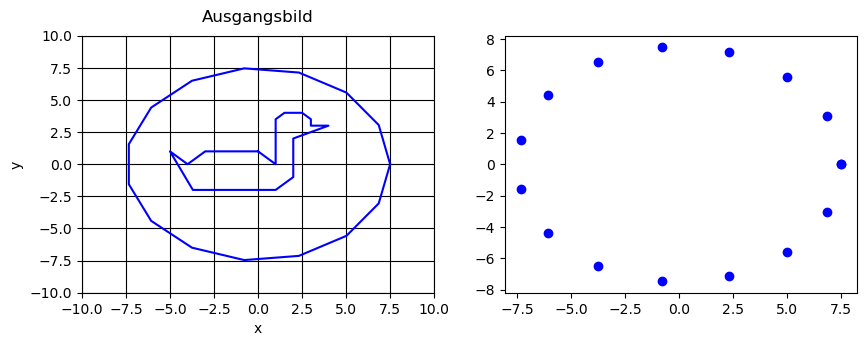

In [532]:
ente=np.array([[0, 1, 1, 1.5 ,2.5 ,3, 3, 4, 2, 2, 1, -3.7, -5, -4, -3, 0],
              [1, 0, 3.5, 4, 4, 3.5, 3, 3, 2, -1, -2, -2, 1, 0, 1, 1]])

A=[]
kreis = cart2pol(ente, 2*math.pi)


f1= plt.figure(figsize=(10,8), dpi=100)


# 1.Subplot: Ausgangsbild
ax1 = plt.subplot(2,2,1)

plt.title("Ausgangsbild", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 
plt.xlabel("x") 
plt.ylabel("y") 

plt.plot(ente[0,:], ente[1,:], color='blue') 
plt.plot(kreis[:,0], kreis[:,1], color='blue') 

# 2.Subplot: nach orth. Trafo. V.T

ax2 = plt.subplot(2,2,2)

plt.plot(kreis[:,0], kreis[:,1], 'o', color='blue', label='Punkte') 

# 3.Subplot: nach Streckung


# 4.Subplot: nach orth. Trafo. U


 
#Plots Einstellungen
plt.subplots_adjust(hspace=0.35)
plt.show() 

#Auswahl von rho und Auflösung von der Matrix Kreis ----> phi Werte.... linspace vergrößern?
